# Neural Network for Leafs

## Preliminaries

In [19]:
%load_ext autoreload
#nice magic to reload modules without kernelrestart
%autoreload 2
# packages not excluded by aimport -<name> are reloaded everytime code is executed! 

import sys
%aimport -sys
import os
%aimport -os
print('Current working directory:', os.getcwd())

import numpy as np
%aimport -numpy
from timeit import default_timer as timer
%aimport -default_timer
import matplotlib.pyplot as plt
%aimport -matplotlib.pyplot
%matplotlib notebook
# or use "inline" instead

# If academia_ai is not installed, include its path here (you might have to enter your custom path here)
path_to_academia_ai = os.path.join(os.pardir, os.pardir)
if path_to_academia_ai not in sys.path:
    sys.path.append(path_to_academia_ai)
import academia_ai as ai
#%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working directory: /Users/Dino/Dropbox/Academia2016/academia_AI/academia_ai/examples


<IPython.core.display.Javascript object>


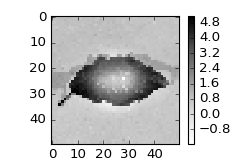

In [20]:
#load data and create training/testing list
path = '../leafs/data/50x50/'
data = ai.preprocessing.createTrainingAndTestingList(path, shuffle = True)
trainset1 = data[0]
testset1 = data[1]

#optinal nomalization
ai.preprocessing.normalize(trainset1)
ai.preprocessing.normalize(testset1)

#take from training and testing only the matrixes, not the whole object "leaf"
training_images1 = [np.array(leaf.image) for leaf in trainset1]
training_solutions1 = [ai.preprocessing.desired_output(leaf.label) for leaf in trainset1]
test_images1 = [np.array(leaf.image) for leaf in testset1]
test_solutions1 = [ai.preprocessing.desired_output(leaf.label) for leaf in testset1]

# Plot of an example image
plt.figure(figsize=(3,2))
plt.imshow(training_images1[0], cmap='Greys', interpolation='none')
plt.colorbar()

## Create layers and build neural network

The net takes dimension (1, 50, 50) as each leaf is represented by
one (greyscale) image of dimension 50x50 pixels. It returns
dimension (7, 1, 1) corresponding to the 7 possible outcomes
[0,1,2,3,4,5,6]. The arrays are always kept three-dimensional
for consistency and are stacked along the first axis (depth).

In [5]:
#create a net
cl = ai.ConvolutionLayer(nr_filters=15, filter_shape=(15,15), stride=1)
th = ai.HyperbolicTangentLayer()
full = ai.FullyConnectedLayer(input_shape=(15,50,50), output_shape=(7,1,1))

net1 = ai.ConvolutionalNeuralNet() 
net1.add_layer(cl)  
net1.add_layer(th)
net1.add_layer(full)
net1.pprint()
print(' ')

#create a diffrent net
cl = ai.ConvolutionLayer(nr_filters=15, filter_shape=(15,15), stride=1)
th = ai.HyperbolicTangentLayer()
full = ai.FullyConnectedLayer(input_shape=(15,50,50), output_shape=(7,1,1))

net2 = ai.ConvolutionalNeuralNet() 
net2.add_layer(cl)  
net2.add_layer(th)
net2.add_layer(full) 
net2.pprint()


Convolutional Neural Network containing the following 3 layers:
Convolutional layer with 15 filters of shape (15, 15)
tangent hyperbolicus layer with m= 0.6666666666666666 and alpha= 1.7159 and beta= 0
FullyConnectedLayer with input_shape (15, 50, 50) and output_shape (7, 1, 1)
Properites of weights: MIN= -0.02 MAX= 0.02 MEAN= 0.0 VAR= 0.0
 
Convolutional Neural Network containing the following 3 layers:
Convolutional layer with 15 filters of shape (15, 15)
tangent hyperbolicus layer with m= 0.6666666666666666 and alpha= 1.7159 and beta= 0
FullyConnectedLayer with input_shape (15, 50, 50) and output_shape (7, 1, 1)
Properites of weights: MIN= -0.02 MAX= 0.02 MEAN= -0.0 VAR= 0.0


Classified label: 4
Correct label: 5


<IPython.core.display.Javascript object>


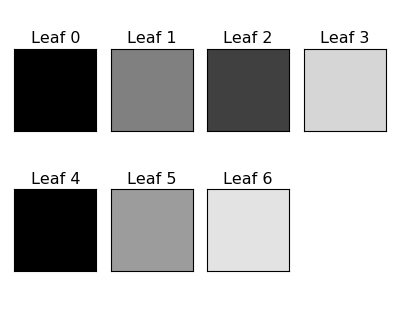

In [21]:
leaf_ex = training_images1[17]
sol_ex = training_solutions1[17]
result = net1.forward_prop(leaf_ex, save_intermediate=True)
intermediate = net1.intermediate_results
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol_ex))

#ploting the result of forward_prop
fig, axarr = plt.subplots(2,4, figsize=(5,4))
for i in range(7):
    axarr.flatten()[i].imshow(result[i],cmap='Greys', vmin=-1, vmax=1)
    axarr.flatten()[i].set_title('Leaf '+str(i))
    axarr.flatten()[i].get_xaxis().set_visible(False)
    axarr.flatten()[i].get_yaxis().set_visible(False)
plt.delaxes(axarr.flatten()[7])
plt.tight_layout()

# Do some training and show the result

new training function: train2(self, training_images, training_solutions, test_images,test_solutions, learning_rate, iterations=1, printTimeConsumtion = False):

In [22]:
learning_rate = 1e-5
iterations = 6
net1.train2(training_images1, training_solutions1, test_images1, test_solutions1, learning_rate, iterations, True)
net2.train2(training_images1, training_solutions1, test_images1, test_solutions1, learning_rate, iterations, True)

Consumed time for  0  iteration: 193.15124055702472  seconds.
Consumed time for  1  iteration: 197.38867775598192  seconds.
Consumed time for  2  iteration: 190.97115416897577  seconds.
Consumed time for  0  iteration: 194.87760895999963  seconds.
Consumed time for  1  iteration: 196.44212123000761  seconds.
Consumed time for  2  iteration: 184.9593656049983  seconds.


<IPython.core.display.Javascript object>


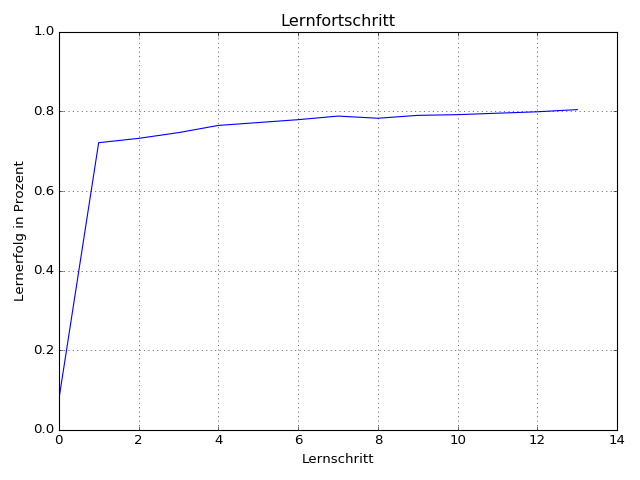

0.7468354430379747


In [23]:
net2.plott_lernSuccess(plt)
print (net2.success_list[3])

<IPython.core.display.Javascript object>


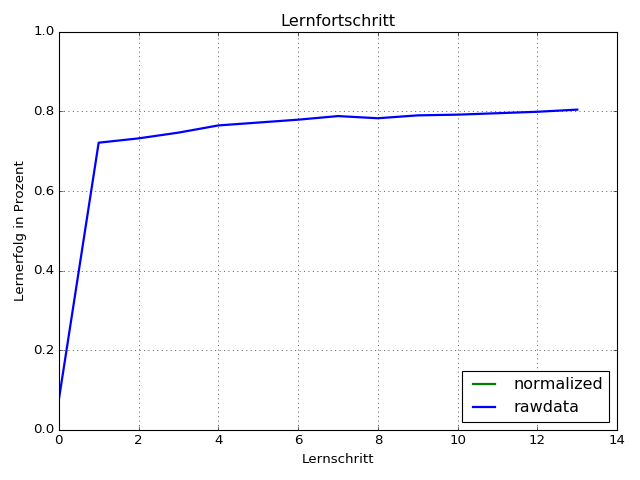

In [25]:
sn1 = net1.success_list
sn2 = net2.success_list

plt.figure()
plt.plot(sn1, 'g-', label='normalized', linewidth = 2)
plt.plot(sn2, 'b-', label='rawdata', linewidth = 2)
plt.legend(loc = 'lower right')
plt.ylim(0,1)
plt.xlabel('Lernschritt')
plt.ylabel('Lernerfolg in Prozent')
plt.title('Lernfortschritt')
plt.tight_layout()
plt.grid(True)

In [ ]:
x=np.linspace(0,10,100)
fig, axarr = plt.subplots(2, 1, figsize=(5,4))
axarr[0].plot(x,np.sin(x))
axarr[1].imshow(intermediate[1][0],cmap='Greys',vmin=-1, vmax=1)
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[0].set_xlabel('x')

plt.tight_layout()

# ADAPT images and solutions to be numpy and desired shape!

In [ ]:
learning_rate = 1e-5
start = timer()
net.train(training_images, training_solutions, learning_rate, iterations=1)
end = timer()
print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)

In [78]:
success_point=[]
for i in range(6):
    learning_rate = 1e-5
    start = timer()
    net.train(training_images, training_solutions, learning_rate, iterations=1)
    end = timer()
    print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)
    
    success_point.append(net.test_net(test_images, test_solutions))
    

Training took 51.53026971700092 seconds.
Training took 52.89118736100136 seconds.
Training took 51.46983148099753 seconds.
Training took 54.064269168000465 seconds.
Training took 52.97072689900233 seconds.
Training took 52.010301188001904 seconds.


<IPython.core.display.Javascript object>


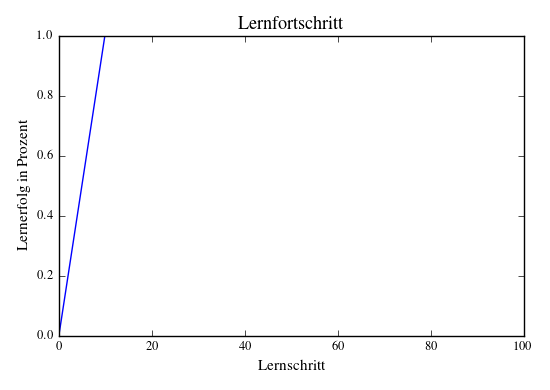

In [103]:
plt.figure()
plt.plot(success_point)
plt.ylim(0,1)
plt.xlabel('Lernschritt')
plt.ylabel('Lernerfolg in Prozent')
plt.title('Lernfortschritt')
#plt.yticks(np.linspace(0,1,100), labels)
plt.tight_layout()